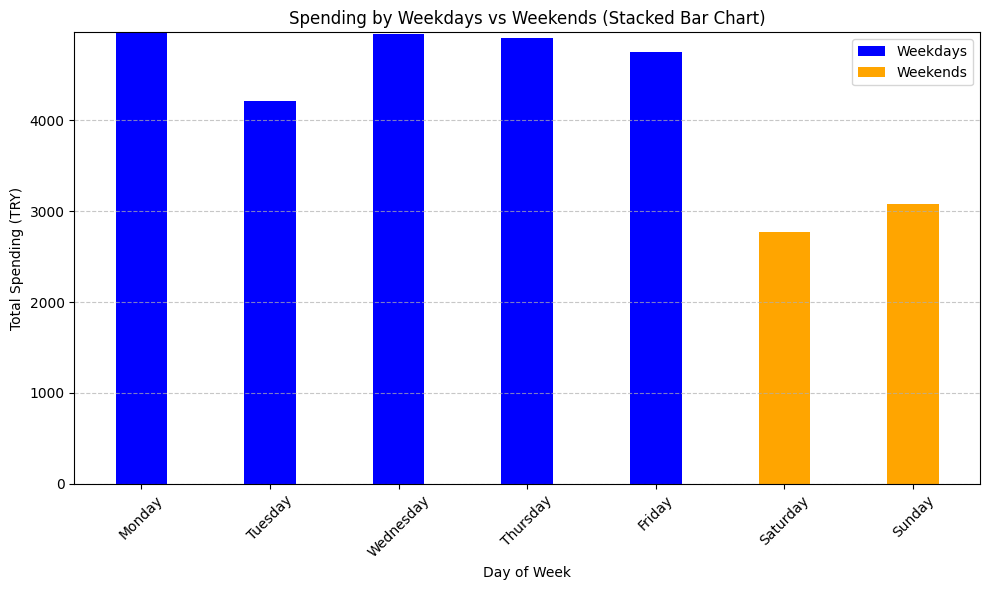

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Veriyi yükleme
data = pd.read_csv('/Users/emre/DSA PROJECT/Emre_YONTUCU_ticket.csv')

# Tarih sütununu datetime formatına çevirme
data['IslemZamanı'] = pd.to_datetime(data['IslemZamanı'], errors='coerce')
data['IslemTutarı'] = data['IslemTutarı'].str.replace(',', '.').astype(float)

# Gün bilgisi ekleme ve hafta sonu kontrolü
data['day_of_week'] = data['IslemZamanı'].dt.day_name()
data['is_weekend'] = data['day_of_week'].isin(['Saturday', 'Sunday'])

# Hafta içi ve hafta sonu harcamalarını hesaplama
weekday_spending = data[data['is_weekend'] == False].groupby('day_of_week')['IslemTutarı'].sum()
weekend_spending = data[data['is_weekend'] == True].groupby('day_of_week')['IslemTutarı'].sum()

# Eksik günleri doldurma
all_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_spending = weekday_spending.reindex(all_days, fill_value=0)
weekend_spending = weekend_spending.reindex(all_days, fill_value=0)

# Stacked bar chart için veri
bar_width = 0.4
index = range(len(all_days))

plt.figure(figsize=(10, 6))
plt.bar(index, weekday_spending, bar_width, label='Weekdays', color='blue')
plt.bar(index, weekend_spending, bar_width, bottom=weekday_spending, label='Weekends', color='orange')

# Grafik ayarları
plt.title('Spending by Weekdays vs Weekends (Stacked Bar Chart)')
plt.xlabel('Day of Week')
plt.ylabel('Total Spending (TRY)')
plt.xticks(index, all_days, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
